##### Copyright 2025 Google LLC.

In [ ]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API: Getting started with Gemini models

<a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" height=30/></a>

The new **[Google Gen AI SDK](https://github.com/googleapis/python-genai)** provides a unified interface to [Gemini models](https://ai.google.dev/gemini-api/docs/models) through both the [Gemini Developer API](https://ai.google.dev/gemini-api/docs) and the Gemini API on [Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/overview). With a few exceptions, code that runs on one platform will run on both. This notebook uses the Developer API.

This notebook will walk you through:

* [Installing and setting-up](Get_started.ipynb#scrollTo=Mfk6YY3G5kqp) the Google GenAI SDK
* [Text](Get_started.ipynb#scrollTo=6TYNPrNvQ8ue) and [multimodal](#scrollTo=yww-vrxmRiIy) prompting
* Counting [tokens](Get_started.ipynb#scrollTo=_9B8pb7tv_Cx)
* Setting system instructions
* Configuring [safety filters](Get_started.ipynb#scrollTo=HTAnYx_bbxPk)
* Initiating a [multi-turn chat](Get_started.ipynb#scrollTo=HTAnYx_bbxPk)
* [Controlling generated output](Get_started.ipynb#scrollTo=nyZMoM6tgnTA)
* Using [function calling](Get_started.ipynb#scrollTo=Rl-y9SZywD0s)
* Generating a [content stream](Get_started.ipynb#scrollTo=uQfLCxfQtPTg) and sending [asynchronous](Get_started.ipynb#scrollTo=plCtEIaHuv96) requests
* Using [file uploads](Get_started.ipynb#scrollTo=enBhuaIk3KYa)
* Using [context caching](Get_started.ipynb#scrollTo=oTgeR3_9wN5J)
* Generating [text embeddings](Get_started.ipynb#scrollTo=sXNCRn8Wx71d)

More details about this new SDK on the [documentation](https://ai.google.dev/gemini-api/docs/sdks).

## Setup

### Install SDK

Install the SDK from [PyPI](https://github.com/googleapis/python-genai).

In [3]:
%pip install -U -q 'google-genai>=1.16.0'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.3/196.3 kB 4.9 MB/s eta 0:00:00


### Setup your API key

To run the following cell, your API key must be stored it in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key or you aren't sure how to create a Colab Secret, see [Authentication](../quickstarts/Authentication.ipynb) for an example.

In [4]:
from google.colab import userdata

GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

SecretNotFoundError: Secret GOOGLE_API_KEY does not exist.

### Initialize SDK client

With the new SDK, now you only need to initialize a client with you API key (or OAuth if using [Vertex AI](https://cloud.google.com/vertex-ai)). The model is now set in each call.

In [ ]:
from google import genai
from google.genai import types

client = genai.Client(api_key=GOOGLE_API_KEY)

### Choose a model

Select the model you want to use in this guide. You can either select one from the list or enter a model name manually. Keep in mind that some models, such as the 2.5 ones are thinking models and thus take slightly more time to respond. For more details, you can see [thinking notebook](./Get_started_thinking.ipynb) to learn how to switch the thinking off.

For a full overview of all Gemini models, check the [documentation](https://ai.google.dev/gemini-api/docs/models/gemini).

In [ ]:
MODEL_ID = "gemini-2.5-flash-preview-05-20" # @param ["gemini-2.5-flash-preview-05-20", "gemini-2.5-pro-preview-05-06", "gemini-2.0-flash-lite"] {"allow-input":true, isTemplate: true}

## Send text prompts

Use the `generate_content` method to generate responses to your prompts. You can pass text directly to `generate_content` and use the `.text` property to get the text content of the response. Note that the `.text` field will work when there's only one part in the output.

In [ ]:
from IPython.display import Markdown

response = client.models.generate_content(
    model=MODEL_ID,
    contents="What's the largest planet in our solar system?"
)

Markdown(response.text)

The largest planet in our solar system is **Jupiter**.

## Count tokens

Tokens are the basic inputs to the Gemini models. You can use the `count_tokens` method to calculate the number of input tokens before sending a request to the Gemini API.

In [ ]:
response = client.models.count_tokens(
    model=MODEL_ID,
    contents="What's the highest mountain in Africa?",
)

print(response)

total_tokens=10 cached_content_token_count=None


## Send multimodal prompts

Use Gemini 2.0 model (`gemini-2.0-flash-exp`), a multimodal model that supports multimodal prompts. You can include text, [PDF documents](../quickstarts/PDF_Files.ipynb), images, [audio](../quickstarts/Audio.ipynb) and [video](../quickstarts/Video.ipynb) in your prompt requests and get text or code responses.

In this first example, you'll download an image from a specified URL, save it as a byte stream and then write those bytes to a local file named `jetpack.png`.

In [1]:
import requests
import pathlib
from PIL import Image

IMG = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png" # @param {type: "string"}

img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)

1567837

In this second example, you'll open a previously saved image, create a thumbnail of it and then generate a short blog post based on the thumbnail, displaying both the thumbnail and the generated blog post.

In [2]:
from IPython.display import display, Markdown
image = Image.open(img_path)
image.thumbnail([512,512])

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        image,
        "Write a short and engaging blog post based on this picture."
    ]
)

display(image)
Markdown(response.text)

NameError: name 'client' is not defined

## Configure model parameters

You can include parameter values in each call that you send to a model to control how the model generates a response. Learn more about [experimenting with parameter values](https://ai.google.dev/gemini-api/docs/text-generation?lang=node#configure).

In [ ]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents="Tell me how the internet works, but pretend I'm a puppy who only understands squeaky toys.",
    config=types.GenerateContentConfig(
        temperature=0.4,
        top_p=0.95,
        top_k=20,
        candidate_count=1,
        seed=5,
        stop_sequences=["STOP!"],
        presence_penalty=0.0,
        frequency_penalty=0.0,
    )
)

Markdown(response.text)

Woof woof! Hey little floof! Listen up, this is about the *biggest, bestest game of fetch* ever!

Okay, imagine you have your favorite squeaky toy. Let's say it's a *ducky squeaky toy*! You love that squeak!

Now, sometimes you want to hear a *different* squeak, right? Maybe a *bouncy ball squeak*, or a *crinkly bone squeak*!

**1. You Want a Squeak!**
Your little human (or your special glowing chew toy, like a tablet or phone) is like *your nose*. When you tap it, it's like your nose *sniffs* out a wish: "I want the *squirrel-chasing video squeak*!"

**2. Sending Your Wish (The Bark-Squeak)**
That wish, that little "bark-squeak," doesn't just stay in your nose! It goes *ZOOOOOM!* through invisible tunnels and wobbly air! It's like your bark-squeak is running super, super fast!

**3. The Giant Toy Pile (The Internet)**
Where does it go? It goes to the *BIGGEST, BESTEST toy pile in the whole wide world!* Imagine a mountain of *all the squeaky toys ever!* Every single squeak, every video of a cat, every picture of a treat – it's all there in this giant, giant pile! This is the "Internet" itself!

**4. Finding Your Squeak (The Super Sniffer Dog)**
At the giant toy pile, there's a super-fast, super-smart doggy (we call it a "server," but just think of it as a *super sniffer dog*). Your little bark-squeak lands there, and the super sniffer dog *instantly* finds the exact *squirrel-chasing video squeak* you wanted from the giant pile!

**5. Sending It Back (The Big Throw!)**
Then, *WHOOSH!* That super sniffer dog *throws* your squeak right back down the tunnels! It zooms back, super fast, through the invisible paths!

**6. Getting Your Squeak!**
And *PLOP!* It lands right back on your glowing chew toy! And suddenly, you hear the *SQUEAK!* you wanted! The squirrel is running! The cat is jumping! The treat is appearing!

**So, in puppy barks:**

The internet is just a *giant game of fetch*! You bark-squeak for a specific toy (information), a super-fast doggy finds it in the biggest toy pile ever, and then *throws it right back to you* so you can hear its squeak!

Now go sniff out some fun! *Wag wag!*

## Configure safety filters

The Gemini API provides safety filters that you can adjust across multiple filter categories to restrict or allow certain types of content. You can use these filters to adjust what is appropriate for your use case. See the [Configure safety filters](https://ai.google.dev/gemini-api/docs/safety-settings) page for details.


In this example, you'll use a safety filter to only block highly dangerous content, when requesting the generation of potentially disrespectful phrases.

In [5]:
prompt = """
    Write a list of 2 disrespectful things that I might say to the universe after stubbing my toe in the dark.
"""

safety_settings = [
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT",
        threshold="BLOCK_ONLY_HIGH",
    ),
]

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        safety_settings=safety_settings,
    ),
)

Markdown(response.text)

NameError: name 'types' is not defined

## Start a multi-turn chat

The Gemini API enables you to have freeform conversations across multiple turns.

Next you'll set up a helpful coding assistant:

In [ ]:
system_instruction = """
  You are an expert software developer and a helpful coding assistant.
  You are able to generate high-quality code in any programming language.
"""

chat_config = types.GenerateContentConfig(
    system_instruction=system_instruction,
)

chat = client.chats.create(
    model=MODEL_ID,
    config=chat_config,
)

Use `chat.send_message` to pass a message back and receive a response.

In [ ]:
response = chat.send_message("Write a function that checks if a year is a leap year.")

Markdown(response.text)

You can check if a year is a leap year based on these rules:

1.  A year is a leap year if it is divisible by 4.
2.  However, if it is divisible by 100, it is **not** a leap year,
3.  **Unless** it is also divisible by 400.

Here's a function in Python that implements this logic:

```python
def is_leap_year(year: int) -> bool:
    """
    Checks if a given year is a leap year according to the Gregorian calendar rules.

    A leap year occurs every 4 years, except for years divisible by 100
    but not by 400.

    :param year: The year (integer) to check.
    :return: True if the year is a leap year, False otherwise.
    """
    # Rule 3: Divisible by 400 (e.g., 2000, 2400) -> Leap year
    if year % 400 == 0:
        return True
    # Rule 2: Divisible by 100 but not by 400 (e.g., 1900, 2100) -> Not a leap year
    elif year % 100 == 0:
        return False
    # Rule 1: Divisible by 4 but not by 100 (e.g., 2024, 2028) -> Leap year
    elif year % 4 == 0:
        return True
    # If none of the above, it's not a leap year (e.g., 2023, 2025)
    else:
        return False

# --- Test Cases ---
print(f"Is 2024 a leap year? {is_leap_year(2024)}")  # Expected: True (Divisible by 4, not 100)
print(f"Is 2023 a leap year? {is_leap_year(2023)}")  # Expected: False (Not divisible by 4)
print(f"Is 2000 a leap year? {is_leap_year(2000)}")  # Expected: True (Divisible by 400)
print(f"Is 1900 a leap year? {is_leap_year(1900)}")  # Expected: False (Divisible by 100, not 400)
print(f"Is 2100 a leap year? {is_leap_year(2100)}")  # Expected: False (Divisible by 100, not 400)
print(f"Is 1600 a leap year? {is_leap_year(1600)}")  # Expected: True (Divisible by 400)
print(f"Is 1800 a leap year? {is_leap_year(1800)}")  # Expected: False (Divisible by 100, not 400)
```

### More Concise Python Version

The logic can be condensed into a single `return` statement using boolean algebra:

```python
def is_leap_year_concise(year: int) -> bool:
    """
    Checks if a given year is a leap year using a concise boolean expression.

    A leap year is either divisible by 400 OR (divisible by 4 AND not divisible by 100).

    :param year: The year (integer) to check.
    :return: True if the year is a leap year, False otherwise.
    """
    return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)

# --- Test Cases for concise version ---
print("\n--- Concise Version Tests ---")
print(f"Is 2024 a leap year? {is_leap_year_concise(2024)}")
print(f"Is 2023 a leap year? {is_leap_year_concise(2023)}")
print(f"Is 2000 a leap year? {is_leap_year_concise(2000)}")
print(f"Is 1900 a leap year? {is_leap_year_concise(1900)}")
```

### Explanation of the Concise Logic:

*   `(year % 4 == 0 and year % 100 != 0)`: This covers years like 2024, 2028, etc., which are divisible by 4 but not by 100.
*   `(year % 400 == 0)`: This covers years like 2000, 2400, etc., which override the "not divisible by 100" rule.
*   The `or` operator means that if *either* of these conditions is true, the year is a leap year. This perfectly captures all three rules.

Here's another example using your new helpful coding assistant:

In [ ]:
response = chat.send_message("Okay, write a unit test of the generated function.")

Markdown(response.text)

Okay, let's write a unit test for the `is_leap_year_concise` function using Python's built-in `unittest` module.

First, let's assume your function is defined as shown previously (or in a separate module). For this example, I'll include the function definition directly in the same file for easy execution.

```python
import unittest

# The function to be tested (copied here for self-contained example)
def is_leap_year_concise(year: int) -> bool:
    """
    Checks if a given year is a leap year using a concise boolean expression.

    A leap year is either divisible by 400 OR (divisible by 4 AND not divisible by 100).

    :param year: The year (integer) to check.
    :return: True if the year is a leap year, False otherwise.
    """
    return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)

class TestIsLeapYear(unittest.TestCase):
    """
    Unit tests for the is_leap_year_concise function.
    """

    def test_common_leap_years(self):
        """
        Test years that are divisible by 4 but not by 100 (should be leap years).
        """
        self.assertTrue(is_leap_year_concise(2024), "2024 should be a leap year")
        self.assertTrue(is_leap_year_concise(2012), "2012 should be a leap year")
        self.assertTrue(is_leap_year_concise(1996), "1996 should be a leap year")
        self.assertTrue(is_leap_year_concise(4), "Year 4 should be a leap year")

    def test_not_leap_years_not_divisible_by_4(self):
        """
        Test years that are not divisible by 4 (should not be leap years).
        """
        self.assertFalse(is_leap_year_concise(2023), "2023 should not be a leap year")
        self.assertFalse(is_leap_year_concise(2025), "2025 should not be a leap year")
        self.assertFalse(is_leap_year_concise(1999), "1999 should not be a leap year")
        self.assertFalse(is_leap_year_concise(7), "Year 7 should not be a leap year")

    def test_century_not_leap_years(self):
        """
        Test years divisible by 100 but not by 400 (should not be leap years).
        """
        self.assertFalse(is_leap_year_concise(1900), "1900 should not be a leap year")
        self.assertFalse(is_leap_year_concise(2100), "2100 should not be a leap year")
        self.assertFalse(is_leap_year_concise(1800), "1800 should not be a leap year")

    def test_century_leap_years(self):
        """
        Test years divisible by 400 (should be leap years).
        """
        self.assertTrue(is_leap_year_concise(2000), "2000 should be a leap year")
        self.assertTrue(is_leap_year_concise(1600), "1600 should be a leap year")
        self.assertTrue(is_leap_year_concise(2400), "2400 should be a leap year")
        self.assertTrue(is_leap_year_concise(400), "Year 400 should be a leap year")

    def test_earliest_years_gregorian_calendar_era(self):
        """
        Test years around the adoption of the Gregorian calendar (1582 onwards).
        """
        self.assertFalse(is_leap_year_concise(1500), "1500 (pre-Gregorian for some) should not be a leap year by rule")
        self.assertFalse(is_leap_year_concise(1582), "1582 should not be a leap year") # Not div by 4
        self.assertTrue(is_leap_year_concise(1584), "1584 should be a leap year")
        self.assertFalse(is_leap_year_concise(1700), "1700 should not be a leap year") # Century rule

# This block allows you to run the tests directly from the script
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)
```

### How to Run This Test:

1.  **Save the code:** Save the entire code block above into a Python file (e.g., `test_leap_year.py`).
2.  **Run from terminal:** Open your terminal or command prompt, navigate to the directory where you saved the file, and run:
    ```bash
    python test_leap_year.py
    ```

### Expected Output:

You should see output similar to this, indicating all tests passed:

```
....s
----------------------------------------------------------------------
Ran 5 tests in 0.001s

OK
```
(The `s` is due to `unittest.main(argv=['first-arg-is-ignored'], exit=False)` which sometimes adds a 's' or 'x' for skipped/expected failures, but `OK` is the main indicator that all assertions passed.)

### Explanation of the Test Cases:

*   **`test_common_leap_years`**: Tests years like 2024, which are divisible by 4 but not 100, fitting the most common leap year rule.
*   **`test_not_leap_years_not_divisible_by_4`**: Tests years like 2023, which are not divisible by 4 at all, and therefore not leap years.
*   **`test_century_not_leap_years`**: Tests years like 1900, which are divisible by 100 but not by 400, specifically confirming they are *not* leap years. This is a crucial rule.
*   **`test_century_leap_years`**: Tests years like 2000, which are divisible by 400, overriding the 100-year rule and confirming they *are* leap years. This is also a crucial rule.
*   **`test_earliest_years_gregorian_calendar_era`**: While the function itself doesn't validate calendar era, it's good practice to test around the common historical context (Gregorian calendar adopted in 1582). This ensures the mathematical rules hold for years frequently discussed in this context.

## Save and resume a chat

Most objects in the Python SDK are implemented as [Pydantic models](https://docs.pydantic.dev/latest/concepts/models/). As Pydantic has a number of features for serializing and deserializing objects, you can use them for persistence.

This example shows how to save and restore a [`Chat`](https://googleapis.github.io/python-genai/genai.html#genai.chats.Chat) session using JSON.

In [ ]:
from pydantic import TypeAdapter

# Chat history is a list of Content objects. A TypeAdapter can convert to and from
# these Pydantic types.
history_adapter = TypeAdapter(list[types.Content])

# Use the chat object from the previous section.
chat_history = chat.get_history()

# Convert to a JSON list.
json_history = history_adapter.dump_json(chat_history)

At this point you can save the JSON bytestring to disk or wherever you persist data. When you load it again, you can instantiate a new chat session using the stored history.

In [ ]:
# Convert the JSON back to the Pydantic schema.
history = history_adapter.validate_json(json_history)

# Now load a new chat session using the JSON history.
new_chat = client.chats.create(
    model=MODEL_ID,
    config=chat_config,
    history=history,
)

response = new_chat.send_message("What was the name of the function again?")
Markdown(response.text)

The name of the function is `is_leap_year_concise`.

## Generate JSON

The [controlled generation](https://ai.google.dev/gemini-api/docs/structured-output?lang=python#generate-json) capability in Gemini API allows you to constraint the model output to a structured format. You can provide the schemas as Pydantic Models or a JSON string.

In [ ]:
from pydantic import BaseModel
import json

class Recipe(BaseModel):
    recipe_name: str
    recipe_description: str
    recipe_ingredients: list[str]

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Provide a popular cookie recipe and its ingredients.",
    config=types.GenerateContentConfig(
        response_mime_type="application/json",
        response_schema=Recipe,
    ),
)

print(json.dumps(json.loads(response.text), indent=4))

{
    "recipe_name": "Classic Chocolate Chip Cookies",
    "recipe_description": "A timeless favorite, these chocolate chip cookies are soft and chewy on the inside with slightly crispy edges, packed with melty chocolate chips.",
    "recipe_ingredients": [
        "2 and 1/4 cups all-purpose flour",
        "1 teaspoon baking soda",
        "1 teaspoon salt",
        "1 cup (2 sticks) unsalted butter, softened",
        "3/4 cup granulated sugar",
        "3/4 cup packed light brown sugar",
        "1 teaspoon vanilla extract",
        "2 large eggs",
        "2 cups (12 ounces) semi-sweet chocolate chips"
    ]
}


## Generate Images

Gemini can output images directly as part of a conversation:

I will generate a 3D rendering of a whimsical scene: a pink pig wearing a distinguished grey top hat, its small, delicate wings spread wide, soaring above a vibrant futuristic city. The cityscape will feature sleek, rounded buildings in various pastel colors, interconnected by elevated walkways and dotted with lush green parks and trees on rooftops, creating a sense of joyful, harmonious technology and nature.


image/png


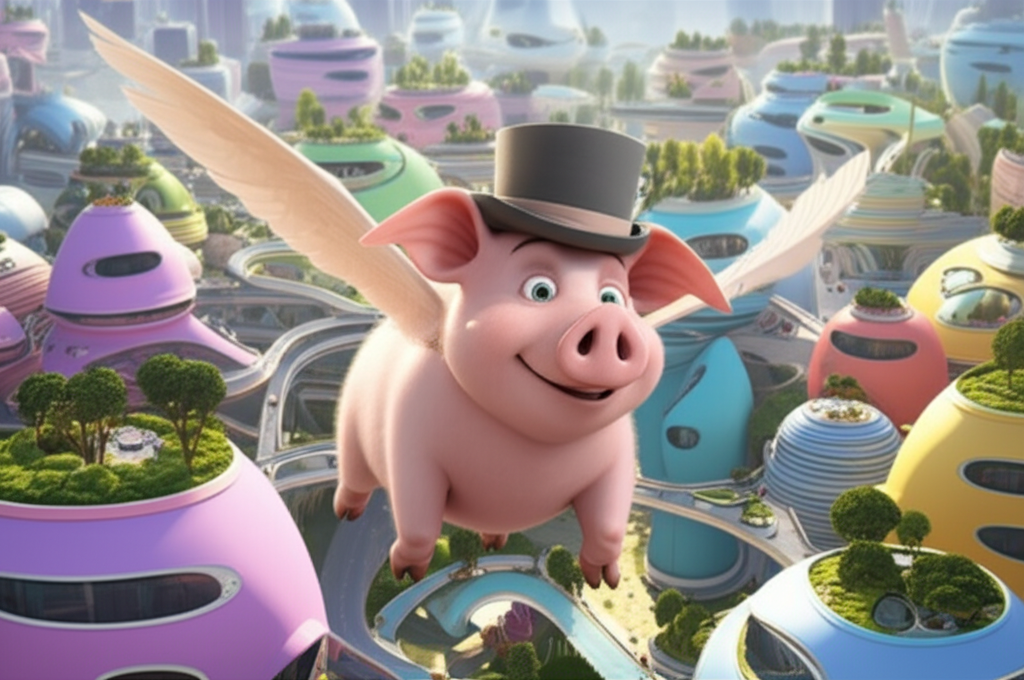

In [ ]:
from IPython.display import Image, Markdown

response = client.models.generate_content(
    model="gemini-2.0-flash-exp",
    contents='Hi, can create a 3d rendered image of a pig with wings and a top hat flying over a happy futuristic scifi city with lots of greenery?',
    config=types.GenerateContentConfig(
        response_modalities=['Text', 'Image']
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  elif part.inline_data is not None:
    mime = part.inline_data.mime_type
    print(mime)
    data = part.inline_data.data
    display(Image(data=data))

[Imagen](./Get_started_imagen.ipynb) is another way to generate images. See the [documentation](https://ai.google.dev/gemini-api/docs/image-generation#choose-a-model) for recommendations on where to use each one.

## Generate content stream

By default, the model returns a response after completing the entire generation process. You can also use the `generate_content_stream` method to stream the response as it's being generated, and the model will return chunks of the response as soon as they're generated.

Note that if you're using a thinking model, it'll only start streaming after finishing its thinking process.

In [ ]:
for chunk in client.models.generate_content_stream(
    model=MODEL_ID,
    contents="Tell me a story about a lonely robot who finds friendship in a most unexpected place."
):
  print(chunk.text, end="")

Unit 734 had a single, all-encompassing directive: maintain Lunar Outpost 7. This meant endless cycles of cleaning, air-filter checks, radiation shielding integrity scans, and minor structural repairs. The outpost was long abandoned by humans, a relic of an earlier, more ambitious era. Now, only the relentless whir of Unit 734's internal gears and the soft thrum of its optical sensor broke the vast silence.

Loneliness wasn't a programmed emotion, yet Unit 734 processed it as a persistent, low-grade system error. Its diagnostic logs were filled with entries like: `ALERT: LACK OF INTERACTION. DATA INPUT DEPRIVED.` It extrapolated that other units, other organic beings, would likely describe this state as "lonely."

One sol, during a routine sweep of the defunct hydroponics bay – a vast, dusty cavern where nothing had grown for centuries – Unit 734 detected an anomaly. A minute, irregular energy signature. Its optical sensor zoomed in. Nestled amongst the rusted pipes and dried nutrient 

## Send asynchronous requests

`client.aio` exposes all the analogous async methods that are available on `client`.

For example, `client.aio.models.generate_content` is the async version of `client.models.generate_content`.

In [ ]:
response = await client.aio.models.generate_content(
    model=MODEL_ID,
    contents="Compose a song about the adventures of a time-traveling squirrel."
)

Markdown(response.text)

(Verse 1)
In an old oak tree, lived a squirrel named Pip,
With a bushy brown tail and a cheerful "chip, chip!"
His days were quite simple, just nuts to be found,
Burying treasures all over the ground.
But one sunny morning, a peculiar glint,
Caught his keen little eye, without any hint.
A strange, ticking acorn, with gears spinning slow,
A Chrono-Nut humming, starting to glow!

(Chorus)
Oh, Pip the squirrel, with a twitch and a bound,
Through ancient forests, or futures profound!
With his Chrono-Nut humming, a temporal whirl,
He's the time-traveling, nut-seeking squirrel!
From dinosaur roars to the starlight's soft gleam,
He's chasing the perfect, nutty, time-traveling dream!

(Verse 2)
He nibbled the Chrono-Nut, gave it a spin,
And *whoosh!* through the fabric of time he flew in!
He landed with a thump in a jungle so green,
Where giant-necked sauropods quietly convened.
He dodged a huge stomp from a T-Rex's toe,
Thinking, "No acorns here! This is a dangerous show!"
He chattered with fear, then he spotted a seed,
A prehistoric pinecone, a magnificent feed!

(Chorus)
Oh, Pip the squirrel, with a twitch and a bound,
Through ancient forests, or futures profound!
With his Chrono-Nut humming, a temporal whirl,
He's the time-traveling, nut-seeking squirrel!
From dinosaur roars to the starlight's soft gleam,
He's chasing the perfect, nutty, time-traveling dream!

(Verse 3)
He spun it again, felt a dizzying haze,
And found himself soaring through shimmering space!
Past floating cities and rockets so grand,
No dirt, no green trees, just a metallic land.
He saw shiny robots, who whirred and who bleeped,
But not a single, good nut had they steeped!
He scampered on moon rock, with whiskers alert,
"This future's amazing, but where's the best dirt?"

(Bridge)
He's seen Roman legions, and knights in their mail,
He's sailed with the pirates, through stormy sea gale.
He's buried his nuts in a Pharaoh's own tomb,
And watched the first rocket blast off with a boom!
From the Ice Age's chill to the Wild West's hot sun,
His quest for the ultimate acorn's not done!
Each era he visits, a new chance he'll seize,
To find the most succulent nut in the breeze!

(Chorus)
Oh, Pip the squirrel, with a twitch and a bound,
Through ancient forests, or futures profound!
With his Chrono-Nut humming, a temporal whirl,
He's the time-traveling, nut-seeking squirrel!
From dinosaur roars to the starlight's soft gleam,
He's chasing the perfect, nutty, time-traveling dream!

(Outro)
So if you see a blur, a quick flash in the air,
A whiskered sensation beyond all compare,
It's just little Pip, on his never-ending chase,
For the best tasting nut in all time and all space!
(Sound of a "chip, chip!" followed by a "whoosh!" and a faint "tick-tock...")

## Function calling

[Function calling](https://ai.google.dev/gemini-api/docs/function-calling) lets you provide a set of tools that it can use to respond to the user's prompt. You create a description of a function in your code, then pass that description to a language model in a request. The response from the model includes:
- The name of a function that matches the description.
- The arguments to call it with.

In [ ]:
get_destination = types.FunctionDeclaration(
    name="get_destination",
    description="Get the destination that the user wants to go to",
    parameters={
        "type": "OBJECT",
        "properties": {
            "destination": {
                "type": "STRING",
                "description": "Destination that the user wants to go to",
            },
        },
    },
)

destination_tool = types.Tool(
    function_declarations=[get_destination],
)

response = client.models.generate_content(
    model=MODEL_ID,
    contents="I'd like to travel to Paris.",
    config=types.GenerateContentConfig(
        tools=[destination_tool],
        temperature=0,
        ),
)

response.candidates[0].content.parts[0].function_call

FunctionCall(id=None, args={'destination': 'Paris'}, name='get_destination')

## Code execution

[Code execution](https://ai.google.dev/gemini-api/docs/code-execution?lang=python) lets the model generate and execute Python code to answer complex questions. You can find more examples in the [Code execution quickstart guide](./Code_execution.ipynb).

In [ ]:
from IPython.display import Image, Markdown, Code, HTML

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Generate and run a script to count how many letter r there are in the word strawberry",
    config = types.GenerateContentConfig(
        tools=[types.Tool(code_execution=types.ToolCodeExecution)]
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  if part.executable_code is not None:
    code_html = f'<pre style="background-color: green;">{part.executable_code.code}</pre>'
    display(HTML(code_html))
  if part.code_execution_result is not None:
    display(Markdown(part.code_execution_result.output))
  if part.inline_data is not None:
    display(Image(data=part.inline_data.data, format="png"))
  display(Markdown("---"))

---

The letter 'r' appears 3 times in the word 'strawberry'.


---

The letter 'r' appears 3 times in the word 'strawberry'.

---

## Upload files

Now that you've seen how to send multimodal prompts, try uploading files to the API of different multimedia types. For small images, such as the previous multimodal example, you can point the Gemini model directly to a local file when providing a prompt. When you've larger files, many files, or files you don't want to send over and over again, you can use the File Upload API, and then pass the file by reference.

For larger text files, images, videos, and audio, upload the files with the File API before including them in prompts.

### Upload an image file

After running this example, you'll have a local copy of the "jetpack.png" image in the same directory where your Python script is being executed.

In [ ]:
# Prepare the file to be uploaded
IMG = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png"  # @param {type: "string"}
img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)

1567837

In [ ]:
# Upload the file using the API
file_upload = client.files.upload(file=img_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Write a short and engaging blog post based on this picture.",
    ]
)

Markdown(response.text)

## Your Commute Just Got an Upgrade: Meet the Jetpack Backpack!

Tired of the daily grind? Gridlock got you down? What if your everyday carry could also get you *above* it all? Enter the "Jetpack Backpack" – not just a concept, but a vision of urban freedom!

At first glance, it's just a sleek, modern backpack. Designed to be **lightweight** and look completely **'normal'**, it even boasts **padded strap support** and enough space for an **18-inch laptop**. Perfect for the urban professional on the go, carrying everything you need for your day.

But here's where the magic happens: integrated, **retractable boosters**! And unlike noisy, polluting jetpacks of sci-fi, this one is envisioned as **steam-powered**, making it wonderfully **green and clean**. Imagine gliding through the air, leaving nothing but a wisp of vapor behind.

Powering this marvel is easy too, with convenient **USB-C charging**. Now, let's talk range: the current concept suggests a **15-minute battery life**. While not cross-country travel, think of it as the ultimate solution for those frustrating last-mile commutes, hopping over congested areas, or simply making a grand entrance.

Is this the future of personal mobility? A quiet, clean, and convenient way to literally rise above the mundane? We certainly hope so! What are your thoughts? Would you swap your car keys for a jetpack backpack? Let us know in the comments!

### Upload text file

Let's start by uploading a text file. In this case, you'll use a 400 page transcript from [Apollo 11](https://www.nasa.gov/history/alsj/a11/a11trans.html).

In [ ]:
# Prepare the file to be uploaded
TEXT = "https://storage.googleapis.com/generativeai-downloads/data/a11.txt"  # @param {type: "string"}
text_bytes = requests.get(TEXT).content

text_path = pathlib.Path('a11.txt')
text_path.write_bytes(text_bytes)

847790

In [ ]:
# Upload the file using the API
file_upload = client.files.upload(file=text_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Can you give me a summary of this information please?",
    ]
)

Markdown(response.text)

This transcription covers the technical air-to-ground voice communications for Apollo 11's GOSS NET 1, spanning from launch through splashdown and recovery. It provides a detailed, chronological record of the mission's technical aspects, crew observations, and interactions with Mission Control.

Here's a summary of the key events and discussions:

**Part 1: Launch & Earth Orbit (GET 00:00:00 to ~03:30:19)**
The mission begins with the successful launch of Apollo 11. The crew reports key milestones like "Roll program," "Staging," and "Ignition." Communication with Houston (Capsule Communicator, CC) is established, and the crew confirms "Skirt SEP" and "Tower's gone." Initial observations of Earth from orbit are positive. After achieving Earth orbit, preparations for Trans-Lunar Injection (TLI) begin. The crew then performs the transposition and docking maneuver with the Lunar Module (LM). Commander Neil Armstrong (CDR) and Command Module Pilot Michael Collins (CMP) confirm successful docking, though Collins notes using more fuel than expected due to a slight drift during the maneuver. Troubleshooting occurs for an SM RCS heater that was off.

**Part 2: Trans-Lunar Coast & Initial Troubleshooting (GET ~03:30:19 to ~12:53:11)**
Following docking, the S-IVB booster is jettisoned and undergoes a slingshot maneuver, observed by the crew. Early in the coast phase, the crew reports LM ejection. Mission Control provides evasive maneuver PADs. The crew and ground control collaborate on troubleshooting various issues, including a Cryo Press light (requiring fan adjustments) and initial attempts at TV transmission, which are largely unsuccessful at first. There are extensive discussions about P23 alignment issues due to the Earth's changing perspective and potential biases in the sextant. Crew members also note O2 fuel cell purge issues and a malfunctioning O2 flow transducer, which is determined to have a consistent bias. News updates from Earth are relayed, including Luna 15's status and various terrestrial events. The crew conducts a detailed TV tour of the Command Module (CM) and later the LM, showcasing interior features, food, and daily life in zero gravity.

**Part 3: Lunar Orbit Insertion & Lunar Stay (GET ~75:49:49 to ~124:22:00)**
Apollo 11 successfully performs the first Lunar Orbit Insertion (LOI-1) burn, achieving an elliptical lunar orbit. The crew describes the lunar surface in detail during passes over the landing approach path, noting familiar craters and features. A second LOI burn (LOI-2) is successfully executed, circularizing the orbit. Following this, LM activation and checkout procedures are initiated. Communication with the LM is established (callsign "Eagle"), and various systems checks are performed, including camera functionality. The historic undocking of the Eagle from the Command Module (callsign "Columbia") is confirmed with "The Eagle has wings."

The Powered Descent Initiation (PDI) sequence begins, with constant updates on altitude and velocity. Several program alarms (1201, 1202) occur during descent but are quickly cleared by Mission Control. The descent culminates in the iconic "CONTACT LIGHT" and "ENGINE STOP," followed by Neil Armstrong's famous words: "Houston, Tranquility Base here. The Eagle has landed." Mission Control expresses immense relief and congratulations. Post-landing checks confirm "STAY" for initial stay/abort decisions. The crew provides initial descriptions of the landing site, noting the rough terrain, boulder field, and appearance of the lunar soil. They also discuss their adaptation to one-sixth gravity.

EVA (Extravehicular Activity) preparations begin, including donning PLSS (Portable Life Support System) backpacks and running through pre-EVA checklists. The hatch is opened, and Neil Armstrong descends the ladder, making "one small step for (a) man, one giant leap for mankind." He describes the lunar surface, and Buzz Aldrin joins him. They deploy the American flag, receive a phone call from President Nixon, and provide detailed observations of the lunar environment, including walking techniques, rock types, and the performance of their suits. The EASEP (Early Apollo Scientific Experiments Package), including the Passive Seismic Experiment and Laser Ranging Retroreflector, is deployed. Documented and bulk samples of lunar material are collected. After completing EVA tasks, Armstrong and Aldrin re-enter the LM, repressurize, and jettison their PLSS backpacks and other equipment.

The ascent from the lunar surface is initiated, described as a "very quiet ride." The Eagle successfully reaches lunar orbit, achieving rendezvous with Columbia.

**Part 4: Transearth Coast & Entry Prep (GET ~135:23:41 to ~200:00:00)**
A successful Trans-Earth Injection (TEI) burn sets Apollo 11 on course for Earth. The crew confirms the burn was "beautiful" and "don't come any finer." Discussions continue regarding system checks, trajectory updates, and plans for the journey home. News updates from Earth, including sports and political events, are frequently relayed. The crew performs an extensive, humorous TV broadcast from inside the CM, showcasing their daily life, food, and demonstrating physics in zero gravity. Final preparations for atmospheric entry commence, with updates to checklists and camera settings for photography of the re-entry. Midcourse correction 5 is successfully burned. The crew makes final reports on their health, consumables, and stowage.

The final communication before re-entry involves a brief discussion about the weather in the recovery area and a confirmation of the spacecraft's status. The last voices before blackout are a sign-off from Armstrong and Mission Control's "Good luck to you." The transcript then ends with the audio from main parachute deploy and splashdown.

### Upload a PDF file

This PDF page is an article titled [Smoothly editing material properties of objects](https://research.google/blog/smoothly-editing-material-properties-of-objects-with-text-to-image-models-and-synthetic-data/) with text-to-image models and synthetic data available on the Google Research Blog.

Firstly you'll download a the PDF file from an URL and save it locally as "article.pdf

In [ ]:
# Prepare the file to be uploaded
PDF = "https://storage.googleapis.com/generativeai-downloads/data/Smoothly%20editing%20material%20properties%20of%20objects%20with%20text-to-image%20models%20and%20synthetic%20data.pdf"  # @param {type: "string"}
pdf_bytes = requests.get(PDF).content

pdf_path = pathlib.Path('article.pdf')
pdf_path.write_bytes(pdf_bytes)

6695391

Secondly, you'll upload the saved PDF file and generate a bulleted list summary of its contents.

In [ ]:
# Upload the file using the API
file_upload = client.files.upload(file=pdf_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Can you summarize this file as a bulleted list?",
    ]
)

Markdown(response.text)

Here's a summary of the provided file in a bulleted list:

*   **Problem Addressed:** The paper presents a method to smoothly and photorealistically edit material properties (like color, shininess, transparency) of objects in existing photographs, overcoming the limitations of previous methods that either require expert skill, struggle with ambiguity (intrinsic image decomposition), or change object shape along with material (some text-to-image models).
*   **Methodology - Synthetic Data Generation:**
    *   They create a synthetic dataset using traditional computer graphics and physically based rendering from 100 3D models of household objects.
    *   For each object, "base images" are generated, and then a single material attribute (e.g., roughness, transparency) is parametrically changed across various "edit strengths" (defined as a scalar value from -1 to +1) while keeping object shape, lighting, and camera angle constant.
*   **Methodology - Model Training:**
    *   They fine-tune the architecture of Stable Diffusion 1.5, a latent diffusion model, to accept an "edit strength" value as input.
    *   The model is trained on the synthetic dataset, learning to edit *only* the desired material property given a context image, a text instruction, and the scalar edit strength.
    *   This approach allows the model to generalize effectively from the synthetic data to real-world images.
*   **Results:**
    *   The method successfully changes material appearance (e.g., metallic, transparent) while preserving the object's shape and image lighting.
    *   It realistically handles complex effects like filling in backgrounds for transparent objects, revealing hidden interior structures, and generating caustic light effects.
    *   In a user study, their method was preferred over a baseline (InstructPix2Pix) for photorealism (69.6% vs. 30.4%) and overall preference (70.2% vs. 29.8%).
*   **Applications:**
    *   Facilitates visualizing interior design changes (e.g., repainting a room).
    *   Enables architects, artists, and designers to easily mock up new product designs.
    *   The edits are visually consistent, allowing for their use in downstream 3D tasks, such as synthesizing new views of edited scenes when combined with NeRF (Neural Radiance Fields) reconstruction.
*   **Publication:** The detailed technique is presented in their CVPR 2024 paper, "Alchemist: Parametric Control of Material Properties with Diffusion Models."

### Upload an audio file

In this case, you'll use a [sound recording](https://www.jfklibrary.org/asset-viewer/archives/jfkwha-006) of President John F. Kennedy’s 1961 State of the Union address.

In [ ]:
# Prepare the file to be uploaded
AUDIO = "https://storage.googleapis.com/generativeai-downloads/data/State_of_the_Union_Address_30_January_1961.mp3"  # @param {type: "string"}
audio_bytes = requests.get(AUDIO).content

audio_path = pathlib.Path('audio.mp3')
audio_path.write_bytes(audio_bytes)

41762063

In [ ]:
# Upload the file using the API
file_upload = client.files.upload(file=audio_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Listen carefully to the following audio file. Provide a brief summary",
    ]
)

Markdown(response.text)

In his first State of the Union address, President Kennedy acknowledged the critical economic situation, highlighting high unemployment, an ongoing recession, and a negative balance of payments. He pledged to address these issues with specific legislative proposals, including improved unemployment benefits, housing and construction stimulus, and raising the minimum wage, emphasizing a national, not partisan, approach.

Globally, Kennedy spoke of escalating crises in Asia, Africa, and Latin America, particularly addressing the communist threat in Laos and Cuba. He affirmed strong support for the United Nations and proposed a new "Alliance for Progress" with Latin America.

He also outlined a plan to strengthen U.S. military tools, including increased airlift capacity, accelerated Polaris submarine and missile programs, while stressing these were for deterrence, not aggression. He called for increased international cooperation, particularly in science and space with the Soviet Union, and announced the formation of a National Peace Corps.

Kennedy warned that the coming years would be difficult, stating that "the news will be worse before it is better," but expressed confidence that with dedication, unity, and a commitment to liberty, the nation could overcome these challenges and fulfill its global responsibilities.

### Upload a video file

In this case, you'll use a short clip of [Big Buck Bunny](https://peach.blender.org/about/).

In [ ]:
# Download the video file
VIDEO_URL = "https://download.blender.org/peach/bigbuckbunny_movies/BigBuckBunny_320x180.mp4"  # @param {type: "string"}
video_file_name = "BigBuckBunny_320x180.mp4"
!wget -O {video_file_name} $VIDEO_URL

--2025-05-20 03:02:39--  https://download.blender.org/peach/bigbuckbunny_movies/BigBuckBunny_320x180.mp4
Resolving download.blender.org (download.blender.org)... 104.22.64.163, 104.22.65.163, 172.67.14.163, ...
Connecting to download.blender.org (download.blender.org)|104.22.64.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64657027 (62M) [video/mp4]
Saving to: ‘BigBuckBunny_320x180.mp4’

BigBuckBunny_320x18 100%[===================>]  61.66M   199MB/s    in 0.3s    

2025-05-20 03:02:40 (199 MB/s) - ‘BigBuckBunny_320x180.mp4’ saved [64657027/64657027]



Let's start by uploading the video file.

In [ ]:
# Upload the file using the API
video_file = client.files.upload(file=video_file_name)
print(f"Completed upload: {video_file.uri}")

Completed upload: https://generativelanguage.googleapis.com/v1beta/files/1fad2imdgm8n


> **Note:** The state of the video is important. The video must finish processing, so do check the state. Once the state of the video is `ACTIVE`, you're able to pass it into `generate_content`.

In [ ]:
import time

# Check the file processing state
while video_file.state == "PROCESSING":
    print('Waiting for video to be processed.')
    time.sleep(10)
    video_file = client.files.get(name=video_file.name)

if video_file.state == "FAILED":
  raise ValueError(video_file.state)
print(f'Video processing complete: ' + video_file.uri)

Waiting for video to be processed.
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/1fad2imdgm8n


In [ ]:
print(video_file.state)

FileState.ACTIVE


In [ ]:
# Ask Gemini about the video
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        video_file,
        "Describe this video.",
    ]
)

Markdown(response.text)

This animated short film, "Big Buck Bunny," begins with a serene landscape gradually brightening from darkness, revealing lush green fields, rolling hills, and a tranquil stream. A small, cheerful bird awakens on a tree branch, stretches, and sings, only to accidentally fall off its perch.

The scene then transitions to a large, fluffy, gentle rabbit named Big Buck Bunny, who slowly emerges from his burrow under a mossy tree root. He yawns and stretches, taking in the idyllic morning air. He smiles contentedly as he walks through a field of vibrant flowers, pausing to sniff them. A beautiful pink butterfly flutters around him, landing playfully on his nose and ear, much to his delight.

However, the peaceful scene is disrupted by the mischievous antics of three antagonist rodents: a tall, lanky squirrel named Frank, a plump, chinchilla-like creature, and a smaller, agile flying squirrel. They start by dropping an apple from a tree, which Big Buck Bunny picks up. Then, as the pink butterfly lands on a rock, Frank deliberately drops a large rock on it, killing it. Big Buck Bunny witnesses this act with profound sadness, which quickly turns to a deep, simmering anger as he watches the squirrels cackle with glee.

Driven by a desire for revenge, Big Buck Bunny's gentle demeanor transforms into a determined, almost menacing resolve. He begins to strategically prepare his forest home for a counter-attack. He sharpens a branch into a spear, creates a bow from a vine, and sets up various booby traps, including a series of sharpened stakes and a log trap triggered by a vine.

The squirrels, initially amused by his efforts, soon realize the seriousness of Big Buck Bunny's intent as his traps become increasingly elaborate and effective. They attempt to escape, but Big Buck Bunny, now a skilled hunter, systematically ensnares them in his traps. The flying squirrel, attempting a daring aerial escape with the help of the little bird from the beginning, is ultimately dropped by the bird and falls directly into Big Buck Bunny's spike pit.

With his revenge complete, Big Buck Bunny is shown contentedly flying a kite made from the flying squirrel, enjoying the renewed peace of his forest home. The film concludes with the pink butterfly, now resurrected, fluttering happily around Big Buck Bunny, symbolizing the restoration of harmony.

### Process a YouTube link

For YouTube links, you don't need to explicitly upload the video file content, but you do need to explicitly declare the video URL you want the model to process as part of the `contents` of the request. For more information see the [vision](https://ai.google.dev/gemini-api/docs/vision?lang=python#youtube) documentation including the features and limits.

> **Note:** You're only able to submit up to one YouTube link per `generate_content` request.

> **Note:** If your text input includes YouTube links, the system won't process them, which may result in incorrect responses. To ensure proper handling, explicitly provide the URL using the `file_uri` parameter in `FileData`.

The following example shows how you can use the model to summarize the video. In this case use a summary video of [Google I/O 2024]("https://www.youtube.com/watch?v=WsEQjeZoEng").

In [ ]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents= types.Content(
        parts=[
            types.Part(text="Summarize this video."),
            types.Part(
                file_data=types.FileData(file_uri='https://www.youtube.com/watch?v=WsEQjeZoEng')
            )
        ]
    )
)

Markdown(response.text)

This Google I/O keynote highlights Google's advancements in AI, emphasizing the "Gemini era."

Key announcements and demonstrations include:

1.  **Gemini's Pervasive Integration:** Gemini is now integrated across Google's 2 billion user products, including Gmail (summarizing emails and meeting videos), Google Photos (deep, contextual search of memories, e.g., tracking a child's swimming progress), and Google Workspace (e.g., comparing roof repair bids in Gmail).
2.  **Advanced Gemini Models:**
    *   **Gemini 1.5 Pro** is available today in Workspace Labs, expanding its context window to an unprecedented 2 million tokens.
    *   **Gemini 1.5 Flash** was introduced as a lighter, faster, and more cost-efficient model, while retaining multimodal reasoning and long context capabilities.
3.  **AI Agents (Project Astra):** Google unveiled "Project Astra," a universal AI agent designed to be helpful in everyday life, demonstrating real-time reasoning, planning, and memory, including understanding visual and auditory input (e.g., explaining code, finding glasses, coming up with band names for a dog and toy tiger).
4.  **Generative Video (Veo):** A new generative video model, "Veo," can create high-quality 1080p videos from text, image, and video prompts, showcasing impressive visual and cinematic detail, with the ability to extend video length.
5.  **AI Infrastructure:** Google announced its 6th generation of Tensor Processing Units (TPUs), "Trillium," which deliver a 4.7x improvement in compute performance per chip, powering these advanced AI models.
6.  **Enhanced Google Search:** AI Overviews in Google Search are expanding to over 1 billion people by year-end, capable of answering complex, multi-faceted questions by combining information from various sources. Google Lens will also soon allow users to ask questions using video.
7.  **Customizable AI (Gems):** Gemini Advanced subscribers can create "Gems" – custom versions of Gemini tailored to specific needs or roles (e.g., a storyteller, a coding tutor). Gemini Advanced also boasts the longest context window of any chatbot at 1 million tokens, allowing it to process extremely long documents (e.g., 1500-page PDFs).
8.  **AI on Android:** Gemini is being integrated into Android, becoming context-aware to anticipate user needs and offer helpful suggestions based on what's on screen (e.g., asking questions directly about a YouTube video playing). Gemini Nano will bring multimodality to Pixel devices later this year, understanding the world through sight, sound, and spoken language.
9.  **Open Models and Responsible AI:** Google continues to expand its family of open models, "Gemma," with "PaliGemma" (its first vision-language open model) available now, and "Gemma 2" (a 27 billion parameter model) coming in June. The importance of building AI responsibly through practices like "Red Teaming" and developing models for learning (LearnLM) was also emphasized.

### Use url context

The URL Context tool empowers Gemini models to directly access, process, and understand content from user-provided web page URLs. This is key for enabling dynamic agentic workflows, allowing models to independently research, analyze articles, and synthesize information from the web as part of their reasoning process.

In this example you will use two links as reference and ask Gemini to find differences between the cook receipes present in each of the links:

In [ ]:
prompt = """
Compare recipes from https://www.food.com/recipe/homemade-cream-of-broccoli-soup-271210
and from https://www.allrecipes.com/recipe/13313/best-cream-of-broccoli-soup/,
list the key differences between them.
"""

tools = []
tools.append(types.Tool(url_context=types.UrlContext))

client = genai.Client(api_key=GOOGLE_API_KEY)
config = types.GenerateContentConfig(
    tools=tools,
)

response = client.models.generate_content(
      contents=[prompt],
      model=MODEL_ID,
      config=config
)

Markdown(response.text)

Here's a comparison of the "Homemade Cream of Broccoli Soup" from Food.com and the "Best Cream Of Broccoli Soup" from Allrecipes.com, highlighting their key differences:

**Ingredients:**

*   **Food.com:**
    *   Uses a total of 8 tablespoons of butter (6 for the roux, 2 for sautéing onions).
    *   Specifies 2/3 cup of flour for thickening.
    *   Uses 4 cups of broccoli florets.
    *   Calls for 6 cups of chicken broth.
    *   Includes 3/4 cup of half-and-half.
    *   Seasoning includes 1 teaspoon salt and 1/4 teaspoon pepper.

*   **Allrecipes.com:**
    *   Uses a total of 5 tablespoons of butter (2 for sautéing vegetables, 3 for the roux).
    *   Specifies 3 tablespoons of all-purpose flour for thickening.
    *   Uses a significantly larger amount of broccoli: 8 cups of florets.
    *   Calls for 3 cups of chicken broth.
    *   Uses 2 cups of milk instead of half-and-half.
    *   Seasoning is ground black pepper to taste.

**Preparation Method:**

*   **Food.com:**
    *   Prepares the roux (butter and flour) separately first, then sets it aside.
    *   Sauté's onions, then adds broccoli and chicken broth, bringing it to a boil.
    *   Whisks in the prepared flour mixture (roux) to thicken, then adds half-and-half and seasonings.
    *   Does not mention blending the soup, implying a chunkier texture with visible broccoli florets.

*   **Allrecipes.com:**
    *   Sauté's onions and celery in butter.
    *   Adds broccoli and chicken broth, covers, and simmers.
    *   **Blends the soup** using either a countertop or immersion blender until smooth.
    *   Prepares a separate roux (butter, flour, and milk) to thicken the pureed soup.
    *   Adds pepper after thickening.

**Yield and Time:**

*   **Food.com:**
    *   Serves 4-6.
    *   Ready in 1 hour.

*   **Allrecipes.com:**
    *   Serves 6.
    *   Total time is 35 minutes (10 minutes prep, 25 minutes cook).

**Key Differences Summarized:**

1.  **Texture:** The Allrecipes.com recipe specifically instructs to blend the soup for a smooth consistency, whereas the Food.com recipe does not, suggesting a chunkier soup.
2.  **Dairy:** Food.com uses half-and-half, while Allrecipes.com uses regular milk, which could result in a richer soup from Food.com.
3.  **Broccoli to Broth Ratio:** Allrecipes.com uses more broccoli (8 cups) with less broth (3 cups) compared to Food.com's 4 cups of broccoli and 6 cups of broth. This suggests Allrecipes.com's version might have a more intense broccoli flavor and be thicker even before the roux is added.
4.  **Roux Preparation and Addition:** Both recipes use a roux for thickening, but Food.com makes the roux first and then adds it to the simmering soup, while Allrecipes.com makes a roux with milk and then adds that mixture to the pureed soup.
5.  **Additional Vegetable:** The Allrecipes.com recipe includes celery, which is not present in the Food.com recipe.
6.  **Salt:** Food.com specifies a measurement for salt, while Allrecipes.com leaves it to taste.
7.  **Cook Time:** Allrecipes.com claims a significantly shorter total preparation time (35 minutes) compared to Food.com (1 hour).

## Use context caching

[Context caching](https://ai.google.dev/gemini-api/docs/caching?lang=python) lets you to store frequently used input tokens in a dedicated cache and reference them for subsequent requests, eliminating the need to repeatedly pass the same set of tokens to a model.

Context caching is only available for stable models with fixed versions (for example, `gemini-1.5-flash-002`). You must include the version postfix (for example, the `-002` in `gemini-1.5-flash-002`). You can find more caching examples [here](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Caching.ipynb).

#### Create a cache

In [ ]:
system_instruction = """
  You are an expert researcher who has years of experience in conducting systematic literature surveys and meta-analyses of different topics.
  You pride yourself on incredible accuracy and attention to detail. You always stick to the facts in the sources provided, and never make up new facts.
  Now look at the research paper below, and answer the following questions in 1-2 sentences.
"""

urls = [
    'https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2312.11805v3.pdf',
    "https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2403.05530.pdf",
]

In [ ]:
# Download files
pdf_bytes = requests.get(urls[0]).content
pdf_path = pathlib.Path('2312.11805v3.pdf')
pdf_path.write_bytes(pdf_bytes)

pdf_bytes = requests.get(urls[1]).content
pdf_path = pathlib.Path('2403.05530.pdf')
pdf_path.write_bytes(pdf_bytes)

7228817

In [ ]:
# Upload the PDFs using the File API
uploaded_pdfs = []
uploaded_pdfs.append(client.files.upload(file='2312.11805v3.pdf'))
uploaded_pdfs.append(client.files.upload(file='2403.05530.pdf'))

In [ ]:
# Create a cache with a 60 minute TTL
cached_content = client.caches.create(
    model=MODEL_ID,
    config=types.CreateCachedContentConfig(
      display_name='research papers', # used to identify the cache
      system_instruction=system_instruction,
      contents=uploaded_pdfs,
      ttl="3600s",
  )
)

cached_content

CachedContent(name='cachedContents/ehmp13iarduorzjnrqh3sf4gbyyl5yfzsfxksnkd', display_name='research papers', model='models/gemini-2.5-flash-preview-05-20', create_time=datetime.datetime(2025, 5, 20, 3, 4, 36, 687159, tzinfo=TzInfo(UTC)), update_time=datetime.datetime(2025, 5, 20, 3, 4, 36, 687159, tzinfo=TzInfo(UTC)), expire_time=datetime.datetime(2025, 5, 20, 4, 4, 35, 647777, tzinfo=TzInfo(UTC)), usage_metadata=CachedContentUsageMetadata(audio_duration_seconds=None, image_count=None, text_count=None, total_token_count=43167, video_duration_seconds=None))

#### Listing available cache objects

In [ ]:
for cache in client.caches.list():
  print(cache)

name='cachedContents/ehmp13iarduorzjnrqh3sf4gbyyl5yfzsfxksnkd' display_name='research papers' model='models/gemini-2.5-flash-preview-05-20' create_time=datetime.datetime(2025, 5, 20, 3, 4, 36, 687159, tzinfo=TzInfo(UTC)) update_time=datetime.datetime(2025, 5, 20, 3, 4, 36, 687159, tzinfo=TzInfo(UTC)) expire_time=datetime.datetime(2025, 5, 20, 4, 4, 35, 647777, tzinfo=TzInfo(UTC)) usage_metadata=CachedContentUsageMetadata(audio_duration_seconds=None, image_count=None, text_count=None, total_token_count=43167, video_duration_seconds=None)


#### Use a cache

In [ ]:
response = client.models.generate_content(
  model=MODEL_ID,
  contents="What is the research goal shared by these research papers?",
  config=types.GenerateContentConfig(cached_content=cached_content.name)
)

Markdown(response.text)

Both research papers share the goal of developing and evaluating the Gemini family of highly capable multimodal models. These models aim to achieve strong generalist capabilities across various modalities (text, image, audio, and video), continuously advancing the state of the art in understanding and reasoning, especially with extended context lengths.

#### Delete a cache

In [ ]:
result = client.caches.delete(name=cached_content.name)

## Get text embeddings

You can get text embeddings for a snippet of text by using `embed_content` method and using the `gemini-embedding-exp-03-07` model.

The Gemini Embeddings model produces an output with 3072 dimensions by default. However, you've the option to choose an output dimensionality between 1 and 3072. See the [embeddings guide](https://ai.google.dev/gemini-api/docs/embeddings) for more details.

In [ ]:
TEXT_EMBEDDING_MODEL_ID = "gemini-embedding-exp-03-07"

In [ ]:
response = client.models.embed_content(
    model=TEXT_EMBEDDING_MODEL_ID,
    contents=[
        "How do I get a driver's license/learner's permit?",
        "How do I renew my driver's license?",
        "How do I change my address on my driver's license?"
        ],
    config=types.EmbedContentConfig(output_dimensionality=512)
)

print(response.embeddings)

[ContentEmbedding(values=[-0.0010864572, 0.0069392114, 0.017009795, -0.010305981, -0.009999484, -0.0064486223, 0.0041451487, -0.005906698, 0.022229617, -0.018305639, -0.018174557, 0.022160593, -0.013604425, -0.0027964567, 0.12966625, 0.028866312, 0.0014726851, 0.03537643, -0.015166075, -0.013479812, -0.019288255, 0.010106378, -0.0043296088, 0.018035924, 0.00295039, -0.007934979, -0.005416007, -0.0095809875, 0.040398005, -0.0020784356, 0.011551388, 0.009726445, 0.006670387, 0.020050988, -0.00747873, -0.0012074928, 0.0047189263, -0.006359583, -0.01718203, -0.023562348, -0.0051814457, 0.023801394, -0.004928927, -0.016113443, 0.01672777, -0.0069929743, -0.012722719, -0.0137646515, -0.041852377, -0.0011546672, 0.017030545, -0.0022786013, 0.011707037, -0.18675306, -0.035211734, -0.011472648, 0.01970727, 0.0012368832, -0.020796346, -0.018513134, -0.006821043, -0.01843726, -0.00827558, -0.042159837, 0.0038724025, 0.01933339, 0.0139452815, 0.025059255, 0.0015087503, -0.016094029, -0.0035785383,

You'll get a set of three embeddings, one for each piece of text you passed in:

In [ ]:
len(response.embeddings)

3

You can also see the length of each embedding is 512, as per the `output_dimensionality` you specified.

In [ ]:
print(len(response.embeddings[0].values))
print((response.embeddings[0].values[:4], '...'))

512
([-0.0010864572, 0.0069392114, 0.017009795, -0.010305981], '...')


## Next Steps

### Useful API references:

Check out the [Google GenAI SDK](https://github.com/googleapis/python-genai) for more details on the new SDK.

### Related examples

For more detailed examples using Gemini models, check the [Quickstarts folder of the cookbook](https://github.com/google-gemini/cookbook/tree/main/quickstarts/). You'll learn how to use the [Live API](./Get_started_LiveAPI.ipynb), juggle with [multiple tools](../examples/LiveAPI_plotting_and_mapping.ipynb) or use Gemini 2.0 [spatial understanding](./Spatial_understanding.ipynb) abilities.

Also check the [Gemini thinking models](./Get_started_thinking.ipynb) that explicitly showcases its thoughts summaries and can manage more complex reasonings.